# STDSR-2023-Assignment 2

## Task 2


In [2]:
import numpy as np
import pandas as pd

## Data preprocessing


In [3]:
# read data
df = pd.read_csv("data/city.csv")
df.head()

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730


In [4]:
# select top 30 populated cities
top30_populated_cities = df.sort_values(by="population", ascending=False).head(30)

new_df = top30_populated_cities[["address", "population", "geo_lat", "geo_lon"]]
new_df

,address,population,geo_lat,geo_lon
509,г Москва,11514330,55.754047,37.620405
786,г Санкт-Петербург,4848742,59.939131,30.315900
647,г Новосибирск,1498921,55.028191,82.921149
832,г Екатеринбург,1377738,56.838522,60.605491
619,г Нижний Новгород,1250615,56.324063,44.005391
927,г Казань,1216965,55.794358,49.111497
782,г Самара,1164900,53.195031,50.106952
656,г Омск,1154000,54.984857,73.367452
1064,г Челябинск,1130273,55.160262,61.400808
757,г Ростов-на-Дону,1091544,47.222457,39.718803


## Simulated annealing


In [5]:
from src.simulated_annealing import SimulatedAnnealing
from tqdm import tqdm

anneal_rates = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]  # annealing rates for experiments

sa = [
    SimulatedAnnealing(
        new_df.values.tolist(), temperature=10000, anneal_rate=alpha, cooldown=1e-6
    )
    for alpha in anneal_rates
]

stats = []
for s in tqdm(sa):
    s.run()
    stats.append(s.get_history()[0])

100%|██████████| 6/6 [00:03<00:00,  1.88it/s]


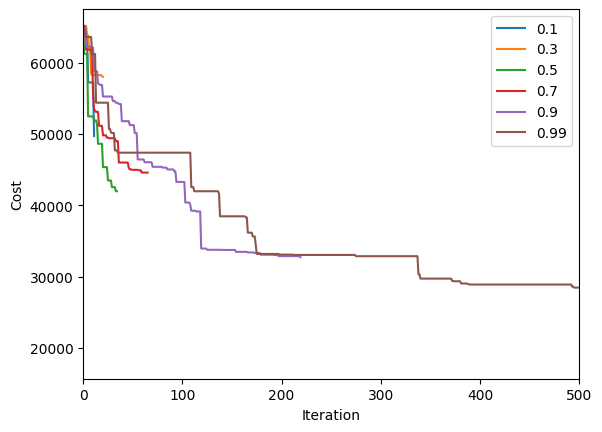

In [6]:
import matplotlib.pyplot as plt

for i, stat in enumerate(stats):
    plt.plot(stat, label=anneal_rates[i])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.xlim((0, 500))
plt.legend()
plt.show()

We can see that with increase of annealing rate the cost of the final solution decreases. Larger annealing rates allows to find better solution but it requires more iterations to converge.


## Animation


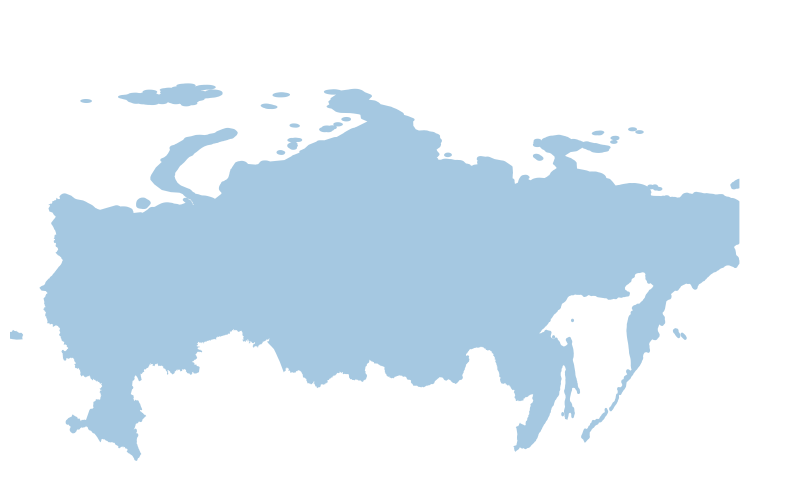

In [10]:
# Plot Russia outline for animation background
import json
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

with open("data/russia.json") as f:
    data = json.load(f)[0]

fig, ax = plt.subplots(figsize=(10, 6))
patches = []
for polygon in data["geojson"]["coordinates"]:
    patches.append(Polygon(polygon[0], closed=True))
p = PatchCollection(patches, alpha=0.4)
ax.add_collection(p)
ax.set_xlim(20, 190)
ax.set_ylim(40, 90)
ax.axis("off")
plt.show()
plt.imsave("data/russia.png", np.array(fig.canvas.renderer.buffer_rgba()))

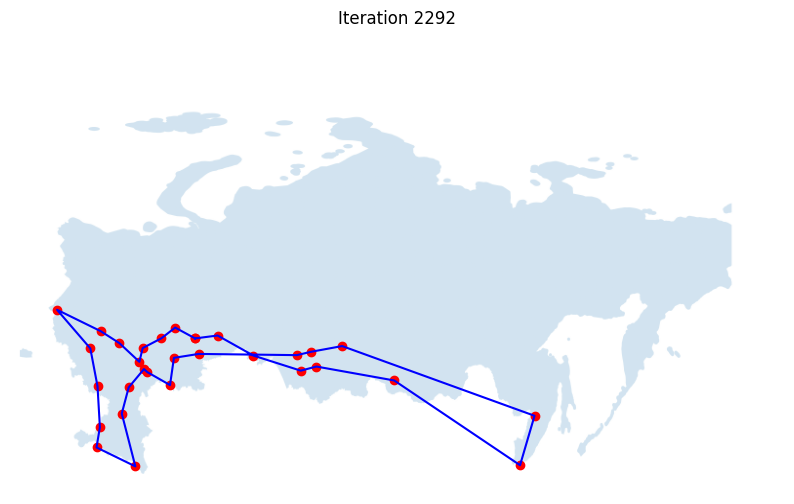

In [12]:
# create animation of the algorithm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

sa_99 = sa[-1]  # best simulated annealing with annealing rate 0.99
cost_history, best_solution_history, current_solution_history = sa_99.get_history()
iterations = sa_99.get_iteration()
lats = np.array(best_solution_history)[:, :, 2].astype(float)
lons = np.array(best_solution_history)[:, :, 3].astype(float)

russia_img = plt.imread("data/russia.png")

fig, ax = plt.subplots(figsize=(10, 6))


def update(i):
    ax.clear()
    ax.imshow(russia_img, extent=[20, 190, 40, 90], aspect="auto", alpha=0.5)
    ax.scatter(lons[i], lats[i], color="red", marker="o")
    ax.plot(lons[i], lats[i], color="blue")
    ax.set_title(f"Iteration {i+1}")
    ax.axis("off")
    ax.set_xlim(20, 190)
    ax.set_ylim(40, 90)


ani = FuncAnimation(fig, update, frames=iterations, interval=100)
ani.save("data/animation.gif", fps=300)
plt.show()

In [13]:
# visualize the route
import folium
from folium.plugins import MarkerCluster

solution = sa_99.get_best_solution()
m = folium.Map(
    location=[new_df["geo_lat"].mean(), new_df["geo_lon"].mean()], zoom_start=2
)
marker_cluster = MarkerCluster().add_to(m)

for i in range(len(solution)):
    folium.Marker(
        location=[solution[i][2], solution[i][3]],
        popup=solution[i][0],
        icon=folium.Icon(color="red", icon="info-sign"),
    ).add_to(marker_cluster)

folium.PolyLine(
    locations=[[solution[i][2], solution[i][3]] for i in range(len(solution))],
    weight=5,
    color="blue",
).add_to(m)
m